# Algoritimo KMeans

In [117]:
# Importando as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt

In [118]:
# criando dados aleátorios
dados = {'x' : [25,34,22,27,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
         'y': [79,51,53,70,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,5, 29,27,8, 7]}

In [119]:
# Cria o dataframe
df = DataFrame(dados, columns=['x','y'])
print(df.head())

    x   y
0  25  79
1  34  51
2  22  53
3  27  70
4  33  59


In [120]:
# Adiciona as bibliotecas para construir o algoritimo
from sklearn.cluster import KMeans

In [121]:
kmeans = KMeans(n_clusters=2) # cria objeto de para o algoritimo k-means para encontrar 2 clusters
kmeans.fit(df)  # Aplica o algoritimo
centroides = kmeans.cluster_centers_ # Encontra as coordenadas dos centroides
print(centroides)

[[40.75       61.125     ]
 [45.69230769 22.30769231]]


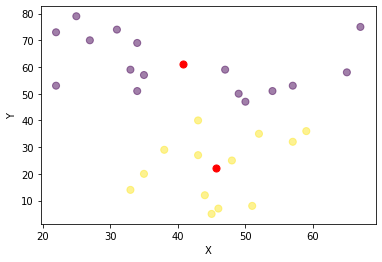

In [122]:
plt.scatter(df['x'],df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:,0],centroides[:,1],c="red", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Exemplo do algoritimo Supervisionado - KNN


In [123]:
# Importando as bibliotecas
import pylab as pl # utilizado para plotar os grafico
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [124]:
# Cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [125]:
# Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [126]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [127]:
# Tranforma os dados em array
X = df_iris.iloc[:,:-1].values #dados de entrada
y = df_iris.iloc[:,4].values   # saidas ou target

In [128]:
# Realiza a divisao dos dados entre treinamento
from sklearn.model_selection import train_test_split  # Função que realiza a divisão do dataset
X_train, X_test, Y_train,Y_test = train_test_split(X,y,test_size=0.20)   # Divide 20% para teste

In [129]:
# Realiza o processo de normalizaçao dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Objeto que normaliza os dados
scaler.fit(X_train)        # Realiza a normalizaçao dos dados

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  # Utiliza a contruçao por meio de 5 vizinho
classifier.fit(X_train, Y_train)  # Aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [131]:
# Realiza a previsao
y_pred = classifier.predict(X_test)

In [132]:
# Constroi a matriz de confusao para comparar o modelo criado
from sklearn.metrics import  classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[ 8  0  0]
 [ 0  7  1]
 [ 0  2 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.78      0.88      0.82         8
         2.0       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



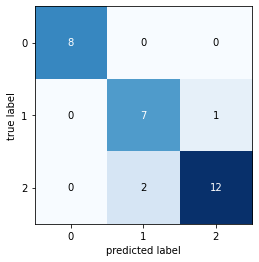

In [133]:
# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(Y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

### Exemplo do algoritimo Supervisionado - Arvore de decisão

In [134]:
from sklearn.tree import DecisionTreeClassifier  # Importa a classificador arvore de decisao
from sklearn import metrics # Importa as metricas para avaliação

In [135]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador 
clf = clf.fit(X_train, Y_train)

# Realiza a previsao de classificação 
y_pred = clf.predict(X_test)

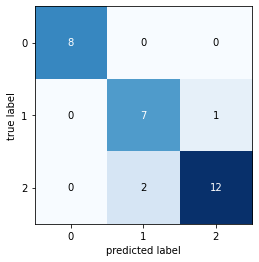

In [136]:
# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(Y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [137]:
# Visualizaçao da arvore de decisão 
# Impor das bibliotecas necessarias para realizar a visualização de árvore de decisao
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

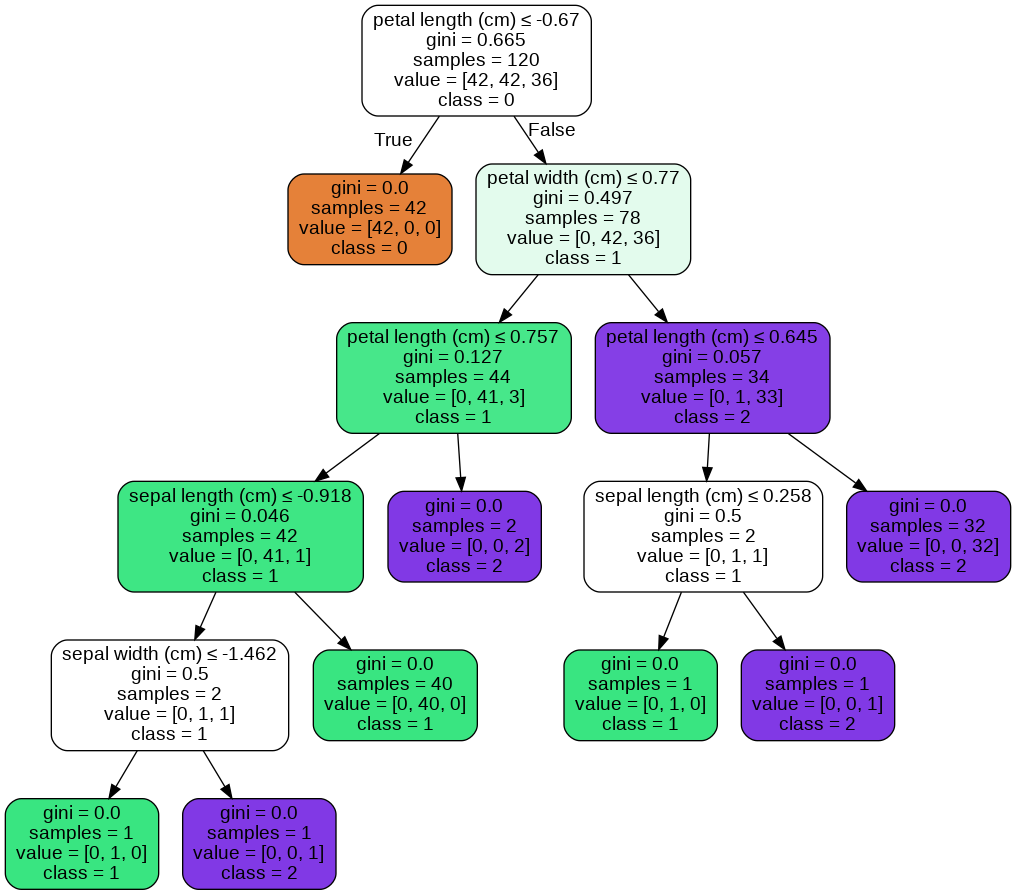

In [138]:
# Constroi a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names= iris.feature_names,class_names=["0","1","2"]
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [139]:
# Biblioteca necessaria para a construção do SVM
from sklearn.svm import SVC

In [140]:
cfl = SVC(gamma="auto") # Escolhe o kernel linear

In [141]:
# Realiza a classifição via SVM
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [142]:
# Realiza a previsao de classificacao
y_pred = clf.predict(X_test)

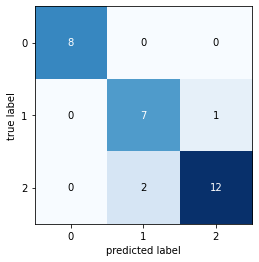

In [146]:
# Avaliando modelo
matriz_confusao = confusion_matrix(Y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fi, ax = plot_confusion_matrix(conf_mat= matriz_confusao)
plt.show()

### Exemplo de Redes Neurais

In [147]:
# definição da biblioteca
from sklearn.neural_network import  MLPClassifier

In [150]:
# Rede com 2 camadas escondidas com 5 neuronios cada
clf  = MLPClassifier(solver="lbfgs",alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

In [151]:
# Realiza o fit do modelo
clf.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [154]:
# Realiza a prediçaõ
y_pred = clf.predict(X_test)

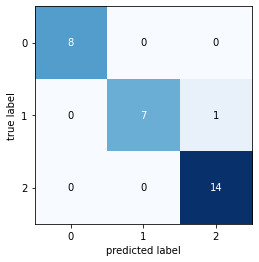

In [156]:
# Avaliando modelo
matriz_confusao = confusion_matrix(Y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fi, ax = plot_confusion_matrix(conf_mat= matriz_confusao)
plt.show()